In [20]:
import pandas as pd
import seaborn as sns
import os
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
df = pd.read_csv('../data/interim/adultos_mayores_limpia.csv')

In [3]:
df.head()

,Unnamed: 0,SEXO,EDAD,CH07,CH15,NIVEL_ED,ESTADO,AM01,V1,V2,V3,IX_TOT,ESTRATO_HOGAR,IPCF
0,0,2,76,4,3,2,3,1,2,1,2,1,1,5000.0
1,1,1,60,2,4,2,1,2,1,2,2,2,3,1500.0
2,2,2,73,5,2,2,3,2,2,1,2,1,1,2000.0
3,3,2,71,4,2,2,3,2,1,1,2,3,3,3400.0
4,4,1,77,5,1,1,3,1,2,1,2,1,1,1500.0


In [4]:
df.describe()

,Unnamed: 0,SEXO,EDAD,CH07,CH15,NIVEL_ED,ESTADO,AM01,V1,V2,V3,IX_TOT,ESTRATO_HOGAR,IPCF
count,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000
mean,2326.500000,1.573700,70.463043,2.828105,1.883111,2.738934,2.564676,1.425870,1.437688,1.129136,1.997636,2.840997,2.340782,2632.759794
std,1343.638406,0.494592,7.997113,1.187774,1.015717,1.805727,0.822794,0.494527,0.496155,0.335387,0.048564,1.835272,0.778709,2711.842748
min,0.000000,1.000000,60.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1163.250000,1.000000,64.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1333.333374
50%,2326.500000,2.000000,69.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,1955.000000
75%,3489.750000,2.000000,76.000000,4.000000,3.000000,4.000000,3.000000,2.000000,2.000000,1.000000,2.000000,3.000000,3.000000,3078.750000
max,4653.000000,2.000000,98.000000,5.000000,9.000000,7.000000,3.000000,2.000000,2.000000,2.000000,2.000000,15.000000,3.000000,70000.000000


In [5]:
df.shape

(4654, 14)

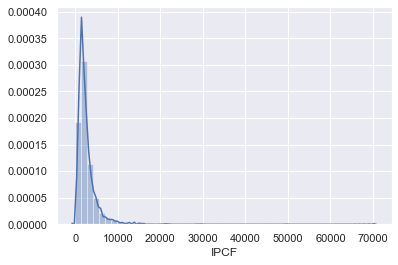

In [6]:
sns.distplot(df["IPCF"])

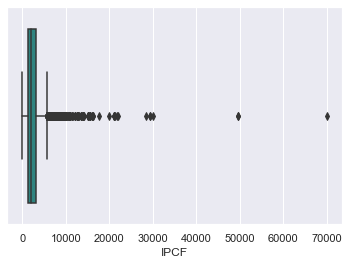

In [7]:
sns.boxplot(x="IPCF", data=df,  palette='viridis')

In [8]:
Q1 = df['IPCF'].quantile(0.25)
Q3 = df['IPCF'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1745.4166259765625


In [9]:
outliers_df = (df['IPCF']< (Q1 - 1.5 * IQR)) |(df['IPCF']> (Q3 + 1.5 * IQR))
outliers_df.sum()

337

In [10]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(4317, 14)

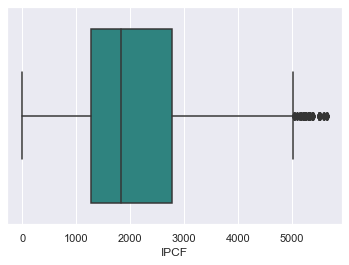

In [11]:
sns.boxplot(x="IPCF", data=df_out,  palette='viridis')

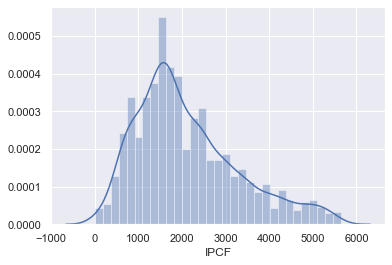

In [12]:
sns.distplot(df_out["IPCF"])

#### Analisis de Outliers de Edad

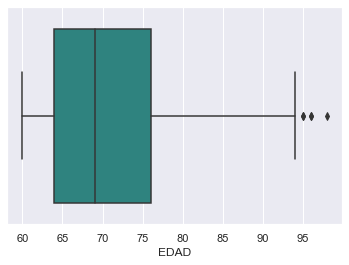

In [13]:
sns.boxplot(x='EDAD', data = df_out, palette='viridis')

In [14]:
df_out['EDAD'].max()

98

In [15]:
df_out['EDAD'].mean()

70.54482279360667

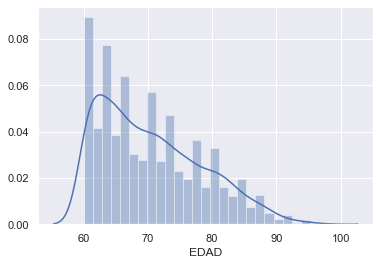

In [16]:
sns.distplot(df['EDAD'])

#### Analisis de Outliers de Nivel Educativo
##### Valores que toma la variable nivel educativo son: 
##### * 1 = Primaria incompleta
##### * 2 = Primaria completa
##### * 3 = Secundaria incompleta
##### * 4 = Secundaria completa
##### * 5 = Superior Universitaria incompleta
##### * 6 = Superior Universitaria completa
##### * 7 = Sin Instruccion
##### * 9 = Ns./Nr.

In [17]:
df_out['NIVEL_ED'].describe()

count    4317.000000
mean        2.641881
std         1.771096
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         7.000000
Name: NIVEL_ED, dtype: float64

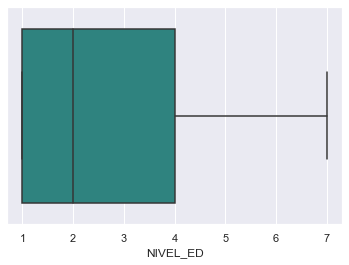

In [18]:
sns.boxplot(x='NIVEL_ED', data = df_out, palette='viridis')

In [21]:
df_out.to_csv(r'../data/interim/adultos_mayores_sin_outliers.csv'.format(os.getcwd()))